# TASK #1: PROJECT OVERVIEW 


![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# TASK #2: IMPORT LIBRARIES/DATASETS

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


![image.png](attachment:image.png)

In [ ]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
X_train,y_train = train['features'],train['labels']
X_validation,y_validation = valid['features'],valid['labels']
X_test,y_test = test['features'],test['labels']

In [ ]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
y_train.shape

(34799,)

# TASK #3: PERFORM IMAGES VISUALIZATION

3

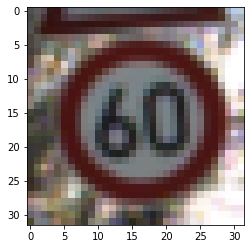

In [ ]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

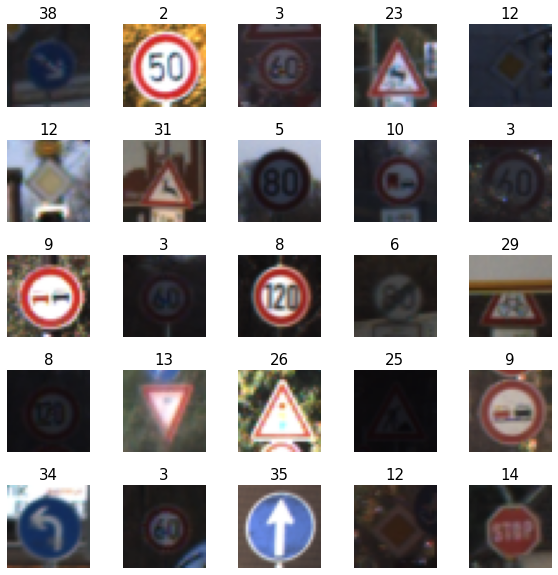

In [ ]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,W_grid*L_grid):
    # Select a random number
    index = np.random.randint(0,n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize=15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [ ]:
from sklearn.utils import shuffle  #shuffling the data 
X_train, y_train = shuffle(X_train, y_train)  #We shuffle the data so that network doesn't learn the order of the images

In [ ]:
X_train_gray = np.sum(X_train/3,axis=3,keepdims= True)
X_test_gray = np.sum(X_test/3,axis=3,keepdims= True)
X_valid_gray = np.sum(X_validation/3,axis=3,keepdims= True)

In [ ]:
X_train_gray.shape

(34799, 32, 32, 1)

In [ ]:
X_train_gray_norm = (X_train_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128
X_valid_gray_norm = (X_valid_gray-128)/128

In [ ]:
X_train_gray_norm.shape

(34799, 32, 32, 1)

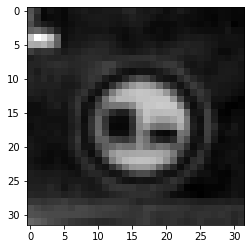

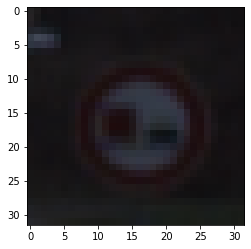

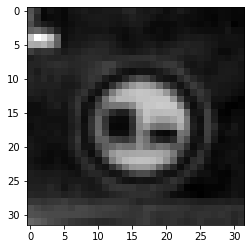

In [ ]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [ ]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16,(5,5),activation='relu'))
CNN.add(layers.AveragePooling2D())

#CNN.add(layers.Dropout(0.2))


CNN.add(layers.Flatten())

CNN.add(layers.Dense(120,activation='relu'))
CNN.add(layers.Dense(84,activation='relu'))
CNN.add(layers.Dense(43,activation='softmax'))
CNN.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)              

# TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [ ]:
CNN.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = CNN.fit(X_train_gray_norm,
                  y_train,
                  batch_size=500,
                  epochs=25,
                  verbose=1,
                  validation_data=(X_valid_gray_norm,y_validation))

Epoch 1/25
70/70 [==============================] - 0s 7ms/step - loss: 0.5799 - accuracy: 0.8351 - val_loss: 0.7075 - val_accuracy: 0.8043
Epoch 2/25
70/70 [==============================] - 0s 5ms/step - loss: 0.4971 - accuracy: 0.8602 - val_loss: 0.6964 - val_accuracy: 0.8032
Epoch 3/25
70/70 [==============================] - 0s 5ms/step - loss: 0.4273 - accuracy: 0.8810 - val_loss: 0.6485 - val_accuracy: 0.8324
Epoch 4/25
70/70 [==============================] - 0s 5ms/step - loss: 0.3849 - accuracy: 0.8926 - val_loss: 0.6090 - val_accuracy: 0.8304
Epoch 5/25
70/70 [==============================] - 0s 5ms/step - loss: 0.3460 - accuracy: 0.9027 - val_loss: 0.5916 - val_accuracy: 0.8372
Epoch 6/25
70/70 [==============================] - 0s 5ms/step - loss: 0.3122 - accuracy: 0.9128 - val_loss: 0.6572 - val_accuracy: 0.8351
Epoch 7/25
70/70 [==============================] - 0s 5ms/step - loss: 0.2832 - accuracy: 0.9211 - val_loss: 0.6000 - val_accuracy: 0.8438
Epoch 8/25
70/70 [==

# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

![image.png](attachment:image.png)

In [ ]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 0.6813 - accuracy: 0.8840
Test Accuracy: 0.8840063214302063


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training & validation Loss')

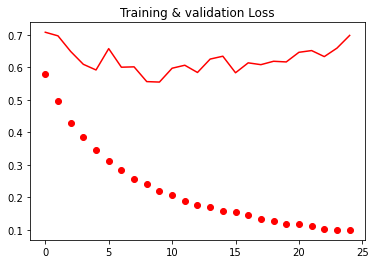

In [ ]:
epochs= range(len(accuracy))
plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('Training & validation Loss')

Text(0.5, 1.0, 'Training & validation Accuracy')

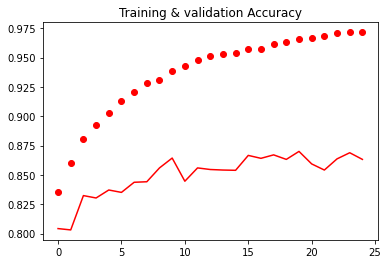

In [ ]:
epochs= range(len(accuracy))
plt.plot(epochs,accuracy,'ro',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'r',label='validation Accuracy')
plt.title('Training & validation Accuracy')

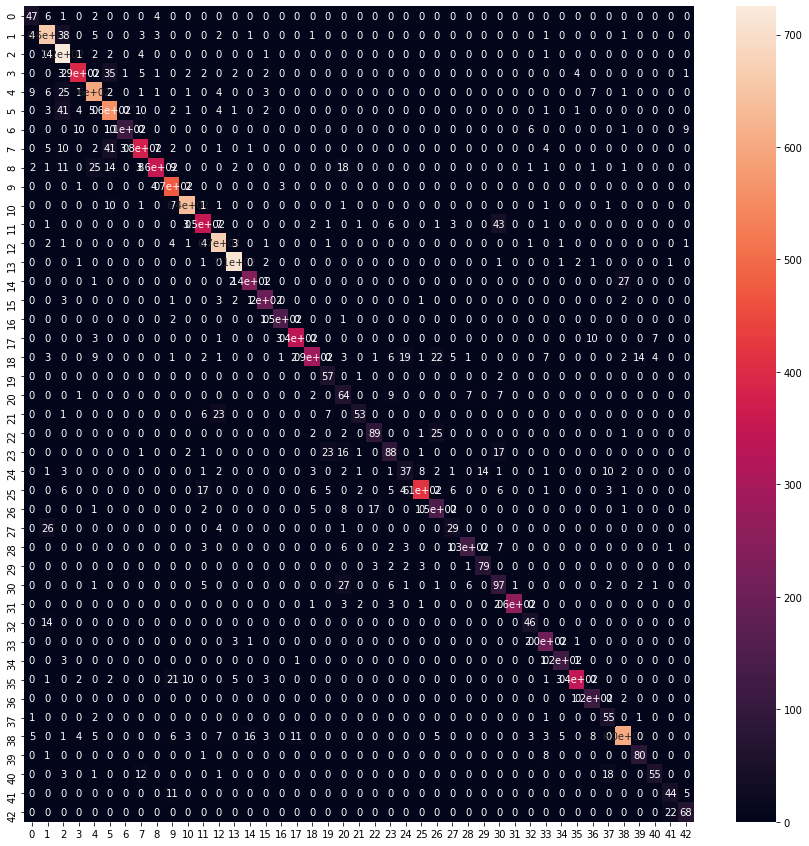

In [ ]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (15, 15))
sns.heatmap(cm, annot = True)

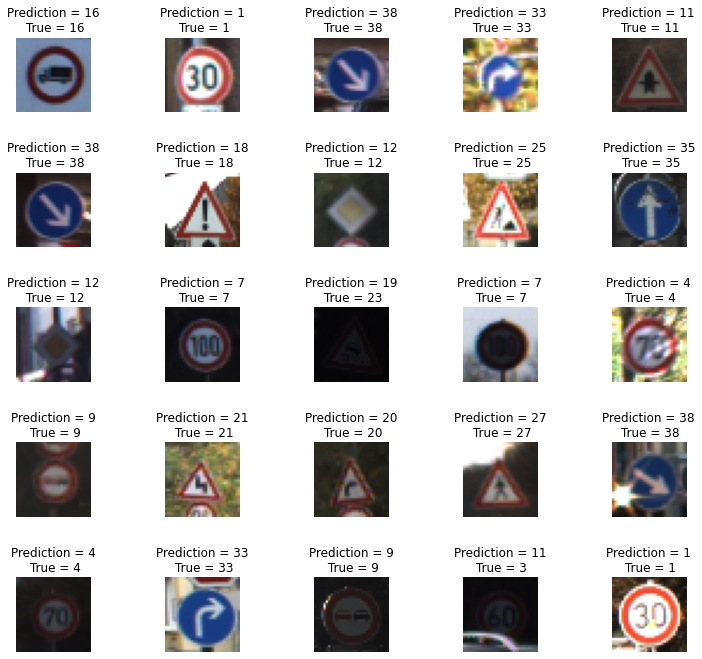

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# CONGRATULATIONS ON FINISHING THE PROJECT!

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }